In [100]:
from skimage import data
from skimage.util import invert
from skimage.morphology import convex_hull_image
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image

In [112]:
horse_mask = invert(data.horse())
horse_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [113]:
horse_hull = convex_hull_image(horse_mask)
horse_hull

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [139]:
img = np.where(horse_mask, 1, 0)
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [135]:
input = np.where(horse_hull, 1, 0)
input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [167]:
contours, _ = cv.findContours(input.astype(np.uint8), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours

(array([[[349,   9]],
 
        [[348,  10]],
 
        [[345,  10]],
 
        ...,
 
        [[359,  11]],
 
        [[358,  10]],
 
        [[358,   9]]], dtype=int32),)

In [168]:
out1 = cv.drawContours(img.astype(np.uint8), contours, -1, (255, 255, 0), 3)
np.unique(out1)

array([  0,   1, 255], dtype=uint8)

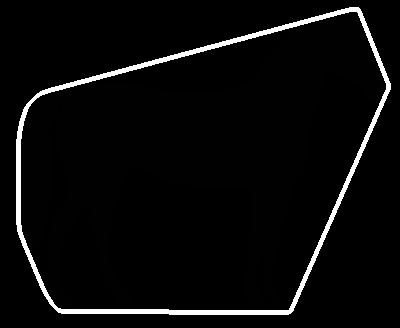

In [169]:
Image.fromarray(out1)

In [178]:
x, y, w, h = cv.boundingRect(contours[0])
out2 = cv.rectangle(out1, (x, y), (x + w, y + h), (125, 125, 125), 1)

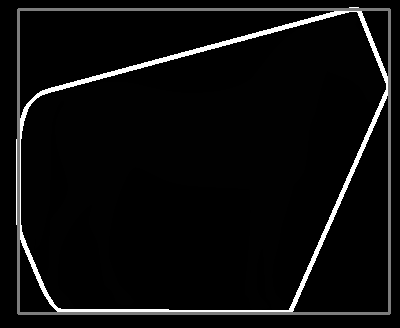

In [179]:
Image.fromarray(out2)

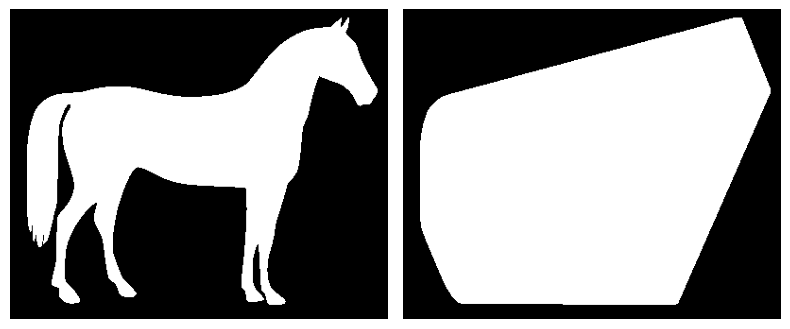

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_axis_off()

axes[1].imshow(hull, cmap=plt.cm.gray)
axes[1].set_axis_off()

plt.tight_layout()
plt.show()